# 阅读笔记

** 作者：方跃文 **

** Email: fyuewen@gmail.com **

** 时间：始于2017年9月12日， 结束写作于 **

** 第四章笔记始于2017年10月17日，结束于2018年1月6日**



# 第四章 Numpy基础：数组和矢量计算

** 时间： 2017年10月17日早晨**

Numpy，即 numerical python的简称，是高性能科学计算和数据分析的基础包。它是本书所介绍的几乎所有高级工具的构建基础。其部分功能如下：

1. ndarray，一个具有矢量算数运算和复杂广播能力的快速且节省空间的多维数组

2. 在不需要循环的情况下，用于对数组快速运算的标准数学函数

3. 用于读写磁盘数据的工具以及用于操作内存映射文件的工具

4. 线性代数、随机数生成以及傅里叶变化

5. 用于集成由 C、C++、Fortran 等语言编写的代码的工具

Numpy 本身功能不复杂，但是理解 Numpy 有助于更高效地使用诸如 Pandas 之类的工具。

原书作者主要从事数据分析，所以他关注的功能主要集中于：

1. 用于数据整理和清理、子集构造和过滤、转换等快速的矢量化数组运算

2. 常用的数组算法，如排序、唯一化、集合运算等。

3. 高效地描述统计和数据聚合/摘要运算

4. 用于异构数据集的合并/连接运算的数据和关系型数据运算

5. 将条件逻辑表述为数组表达式（而不是带有if-elif-else分支的循环）

6. 数据的分组运算（聚合、转换、函数应用等）第五章将对此进行详细解释。

注：建议总是使用 import numpy as np； 而不是用 from numpy import *

## Numpy 的 ndarray：一种多维数组对象

** 时间： 2017年10月18日晚**

Numpy 一个重要特点就是其 N 维数组对象，即 ndarray，该对象是一个快速而灵活的数据集容器。我们可以利用这种数组对整块数据进行一些运算，它的语法跟标量元素之间的运算相同：

In [2]:
import numpy.random as nrandom
data = nrandom.randn(3,2)

In [3]:
data

array([[-1.2847123 ,  0.25253289],
       [ 1.73730858,  0.08645995],
       [ 1.48498789, -0.20011572]])

In [4]:
data*10

array([[-12.84712304,   2.52532891],
       [ 17.3730858 ,   0.86459945],
       [ 14.84987886,  -2.00115719]])

In [5]:
data + data

array([[-2.56942461,  0.50506578],
       [ 3.47461716,  0.17291989],
       [ 2.96997577, -0.40023144]])

ndarray 是 **同构**数据多维容器，that is to say, 所有元素必须是同类型的。

每个数组都有一个 shape （一个表示各维度大小的元祖）和一个 dtype （一个用于说明数组数据类型的对象）：

In [6]:
data.shape # 数组的维数，即行数和列数

(3, 2)

In [7]:
data.dtype #数组中元素的类型

dtype('float64')

In [9]:
data.size #数组的大小

6

In [14]:
dataconversion = data.astype('int8')
print('data is: ', data)
print('\n dataconversion is ', dataconversion)

data is:  [[-1.2847123   0.25253289]
 [ 1.73730858  0.08645995]
 [ 1.48498789 -0.20011572]]

 dataconversion is  [[-1  0]
 [ 1  0]
 [ 1  0]]


虽然大多数数据分析工作不需要深入理解Numpy，但是精通面向数组的编程和思维方式是成为 Python 科学计算达人的一大步骤。

**注意**：第一版翻译版本中有个批注，说“本书中的数组、Numpy数组、ndarray 基本指的都是同一样东西，即 ndarray 对象”

### 创建 ndarray

创建数组最简单的办法就是使用 array 函数。它接受一切序列行的对象（包括其他数组），然后产生一个新的含有传入数据的 NumPy 数组。以列表转换为数组方式为例：

In [15]:
import numpy as np
data1 = [2,3,3,5,6,9]
array1 = np.array(data1)

In [16]:
print('data1 is ', type(data1))
print('array1 is ', type(array1))

data1 is  <class 'list'>
array1 is  <class 'numpy.ndarray'>


In [18]:
data1[:]

[2, 3, 3, 5, 6, 9]

In [21]:
array1

array([2, 3, 3, 5, 6, 9])

In [22]:
print(array1)
print(array1.dtype)
print(array1.shape)
print(array1.size)

[2 3 3 5 6 9]
int64
(6,)
6


嵌套序列（比如由一组等长列表组成的列表），将会被转换为一个多维数组：

In [23]:
import numpy as np

data2=[[23,5,5,6], [4,56,2,8],[3,5,6,7],[2,3,4,5]]
arr2=np.array(data2)

In [103]:
arr2

array([[23,  5,  5,  6],
       [ 4, 56,  2,  8],
       [ 3,  5,  6,  7],
       [ 2,  3,  4,  5]])

In [104]:
arr2.ndim #Number of array dimensions.

2

In [105]:
arr2.shape

(4, 4)

In [24]:
arr2.size

16

除非显示说明，np.array 会尝试为新建的这个数组推断出一个较为合适的数据类型。数据类型保存在一个特殊的 dtype 对象中。比如说，在上面的两个examples中，我们有

In [106]:
data.dtype

dtype('float64')

In [107]:
arr2.dtype

dtype('int64')

除 np.array 之外，还有一些函数可以新建数组。比如，zeros 和 ones 分别可创建指定长度或形状的全 0 和 全 1 数组。empty 可创建一个没有任何具体值的数组。要用这些方法创建多维数组，只需要传入一个表示形状的元祖即可：

In [108]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [109]:
arr4 = np.zeros((3,6,3))
arr4

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]])

In [110]:
arr4.ndim

3

In [111]:
arr3 = np.empty((2,4,2))
arr3

array([[[  2.68156159e+154,   1.73059637e-077],
        [  3.95252517e-323,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000]],

       [[  0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   2.41907520e-312],
        [  1.49457220e-154,   1.11686881e-308]]])

In [112]:
arr3.ndim

3

In [113]:
arr5 = np.empty((2,3,4,2))
arr5

array([[[[  2.68156159e+154,   2.68156159e+154],
         [  1.38338381e-322,   0.00000000e+000],
         [  0.00000000e+000,   4.82337433e+228],
         [  5.82381892e-144,   1.16097020e-028]],

        [[  6.37116372e-067,   2.26469648e-076],
         [  1.04049573e-042,   3.97062373e+246],
         [  1.16318408e-028,   6.38128457e-067],
         [  6.48974110e+169,   4.66553371e-062]],

        [[  5.44022288e-062,   5.04621361e+180],
         [  8.37170571e-144,   4.30808514e-096],
         [  6.32299154e+233,   6.48224638e+170],
         [  4.93432906e+257,   3.83819517e+151]]],


       [[[  9.23455297e-071,   9.50155743e+169],
         [  1.18753139e-075,   7.62634209e+169],
         [  5.81563984e+294,   2.08600674e-308],
         [  2.68156159e+154,  -4.33188355e-311]],

        [[  6.42285340e-323,   0.00000000e+000],
         [  6.93086265e-310,   1.04082753e-047],
         [  6.20395251e-091,   6.23124110e-038],
         [  3.55143728e-062,   1.17096846e-046]],

        

** 警告 ** 认为 np.emptry 会返回全 0 数组的想法是不安全的。很多情况下（如上所示），它返回的都是一些未初始化的垃圾值。

arange 是 Python 内置函数range 的数组版：

In [114]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [115]:
np.arange(2)

array([0, 1])

下表列出了一些数组创建函数。由于Numpy关注的是数值计算，因此，如果没有特别的制定，数据类型一般都是 float64。


|函数 | 说明 |
|-------------|---------------|
| array | 将输入数据(列表、元祖、数字或者其他数据类型)转换为 ndarray。要么推断出 dtype，要么显示地指定dtype。默认直接复制输入数据|
| asarray | 将输入转为 ndarray，如果输入本身就是一个ndarray就不进行复制|
| arange | 类似于python内置的range,但是返回的是一个ndarray,而不是一个列表|
| ones、ones_like | 根据指定的形状和dtype创建一个全1数组。ones_like以另一个数组为参数，并根据其形状和dtype创建一个全1数组|
|zeros、zeros_like | 类似上述命令，只是改为全0数组|
|empty、empty_like|创建新数组，只分配内存空间但不填充任何值|
|eye、identity|创建一个正方的N * N 单位矩阵（对角线为1，其余为0）|

In [116]:
data1 = (1,2,3,4)

In [117]:
np.asarray(data1)

array([1, 2, 3, 4])

In [118]:
np.array(data1)

array([1, 2, 3, 4])

In [119]:
data2 = ([2,2])
np.asarray(data2)


array([2, 2])

In [120]:
import numpy as np
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [121]:
ones

NameError: name 'ones' is not defined

In [122]:
np.ones(19)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.])

In [123]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [124]:
np.empty(4)

array([ 291.627    ,  233.4546179,  307.502    ,  243.4546179])

In [125]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [126]:
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [127]:
np.identity(2)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [128]:
np.identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

### ndarray 的数据类型

Recently I jsut moved from Shanghai to Kyoto, hence I have stopped taking notes for almost two weeks. 
From now on, I will continue writing this notes. Let's note~

YWFANG @Kyoto University November, 2017

dtype()

dtype 是一个特殊的对象，它含有ndarray将一块内存解释为特定数据类型的所需信息：

In [129]:
import numpy as np

arr1 = np.array([1,2,3], dtype = np.float64)
arr2 = np.array([1,2,3], dtype = np.int32)

In [130]:
arr1.dtype

dtype('float64')

In [131]:
arr2.dtype

dtype('int32')

dtype 是 NumPy 强大的原因之一。在多数情况下，它们直接映射到相应的机器表示，这使得“读写磁盘上的二进制数据流”以及“集成低级语言，如fortran"等工作变得简单。

下表记录了NumPy所支持的全部数据类型：（记不住没有关系，刚开始记不住也很正常）

|类型|类型代码|说明
|-------------|---------------|
|int8、unit8| i1、u1| 有符号和无符号的8位（1个字节）整型|
|int16、unit16| i2、u2| 有符号和无符号的16位（2字节）整型|
|int32、unit32| i4、u4| 。。。32位。。。|
|int64、unit64| i8、u8|。。。64位。。。|
| float16| f2| 半精度浮点数|
| flaot32| f4或者f| 标准单精度浮点数，与C的float兼容|
| float64| f8或d | 标准双精度浮点数，与C的double和Python的float对象兼容|
|float128| f16或者g| 扩展精度浮点数|
|complex64、complex128|c8、c16| 分别用两个32位、64位或128位浮点数表示的复数|
|complex256|c32|复数|
| bool|？|存储True 或Flase 值的布尔类型|
|object | O | Python多象类型|
| string_|S|固定长度的字符串类型（每个字符1个字节）。例如，要创建一个长度位10的字符串，应使用S10|
|unicode|U|固定长度的unicode类型（字节数由平台决定）。跟字符串定义方式一样（如U10）|


我们可以通过 ndarray 的 astype 方法显示地转换其dtype：

In [132]:
import numpy as np

arr = np.array([1,2,3,4,5], dtype='i2')
print(arr.dtype)
print(arr)

int16
[1 2 3 4 5]


In [133]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In the above example, an integer array was converted into a floating array.

In the following example, I will show you how to convert a float array to an int array. You will see that, if I cast some floating point numbers to be of interger type, the decimal part will be truncated.

In [134]:
import numpy as np
arr = np.array([1.2, 2.3, 4.5, 53.4,3.2,4.2])
print(arr.dtype)
print(arr)
print(id(arr)) #memoery address of arr

print('\n')
#conversion to integer
int_arr = arr.astype(np.int32)
print(int_arr.dtype)
print(int_arr)

float64
[  1.2   2.3   4.5  53.4   3.2   4.2]
4603736272


int32
[ 1  2  4 53  3  4]


If you have an array of strings representing numbers, you can also use 'astype' to convert them into numberic form:

In [135]:
import numpy as np
num_strings_arr = np.array(['1.25', '-9.6', '42'], dtype = np.string_)
print(num_strings_arr)
print(num_strings_arr.dtype)

float_arr = num_strings_arr.astype(np.float64)
# num_strings_arr.astype(float)
print(float_arr.dtype)
print(float_arr)

# alternatively, we can use a lazy writing
float1_arr = num_strings_arr.astype(float)
print(float_arr.dtype)
print(float_arr)

[b'1.25' b'-9.6' b'42']
|S4
float64
[  1.25  -9.6   42.  ]
float64
[  1.25  -9.6   42.  ]


In addition, we can use another array’s dtype attribute:

In [136]:
# in this example, we can see that the int_arry will converted into
# a floating array, in particular, the dtype of calibers was used
# during the conversion using astype(calibers.dtype)
import numpy as np
int_array = np.arange(10)
print(int_array, int_array.dtype)

calibers = np.array([.22, .20, .23,.45, .44], dtype=np.float64)
print(calibers , calibers.dtype)

int_array_new = int_array.astype(calibers.dtype)
print(int_array_new, int_array_new.dtype)

[0 1 2 3 4 5 6 7 8 9] int64
[ 0.22  0.2   0.23  0.45  0.44] float64
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.] float64


In [137]:
#when stating an array, we can use the short code in the table to assign
# the dtype of the array
# for example

import numpy as np

empty_array = np.empty(8, dtype='u4')
print(empty_array)

print('\n')

zero_array = np.zeros(12, dtype='u4')
print(zero_array, zero_array.dtype)

print('\n')

one_array = np.ones(9, dtype='f8')
print(one_array, one_array.dtype)
print(*one_array)

[         0 1072693248          0 1072693248          0 1072693248
          0 1072693248]


[0 0 0 0 0 0 0 0 0 0 0 0] uint32


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.] float64
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0


点数（比如float64和float32）只能表示近似的分数值。因此复杂计算中，由于可能积累的浮点错误，比较浮点数字大小时，只能在一定的小数位数以内有效。

### 数组和标量之间的运算

数据的便利之处在于即使我们不用loop，也可以对批量数据进行运算和操作。这种方式通常叫做“矢量化”（vectorization）。大小相等的数组之间的任何算数运算都会将运算应用到元素级：

In [138]:
import numpy as np

arr = np.array([[1., 2., 3.,],[3.,5.,6.]])
print(arr.shape)

print(arr)

(2, 3)
[[ 1.  2.  3.]
 [ 3.  5.  6.]]


In [139]:
arr*arr

array([[  1.,   4.,   9.],
       [  9.,  25.,  36.]])

In [140]:
arr-arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [141]:
arr+arr

array([[  2.,   4.,   6.],
       [  6.,  10.,  12.]])

同样地，当数组与标量进行算数运算时，也会遍历到各个元素

In [142]:
1/arr

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.33333333,  0.2       ,  0.16666667]])

In [143]:
arr*2

array([[  2.,   4.,   6.],
       [  6.,  10.,  12.]])

不同大小的数组之间的运算叫做广播 broadcasting，我们之后还会在第12章进行深度的学习。

### 基本的索引和切片

NumPy 数组的索引是一个内容丰富的主题，因为选取数据子集或者单个元素的方式非常多。一维数组很简单。从表面看，它们跟python列表的功能差不多。

In [144]:
import numpy as np

arr = np.arange(10, dtype='i1')
print(arr)
print(arr.dtype)

[0 1 2 3 4 5 6 7 8 9]
int8


In [145]:
print(arr[0],arr[5])
print(arr[0:2])

0 5
[0 1]


In [146]:
arr[5:8]=12
print(arr)

[ 0  1  2  3  4 12 12 12  8  9]


In [147]:
#作为对比，我们回顾下之前列表的一些操作

list1=[0,1,2,3,4,5,6,7,8,9]
print(list1[:])
print(list1[0:2])

list1[5] = 12
print(list1[:])

list1[5:8]=12 #这里是跟数组很不同的地方
#如果不使用一个iterable，这里并无法赋值
print(list1[:])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1]
[0, 1, 2, 3, 4, 12, 6, 7, 8, 9]


TypeError: can only assign an iterable

如上面例子中看到的那种，当我们将标量赋值给一个切片时（arr[5:8]=12)，该值会自动传播（也就是12章将降到的broadcasting）到整个选区。跟列表最重要的区别在于，数组切片是原始数组的视图。这意味着数据不会被复制，视图上任何的修改都会直接反映到源数组上。

In [148]:
import numpy as np

arr = np.arange(10)
print(arr)
arr_slice = arr[5:8]
arr_slice[1] = 12345


print(arr)

arr_slice[:]=123
print(arr)

[0 1 2 3 4 5 6 7 8 9]
[    0     1     2     3     4     5 12345     7     8     9]
[  0   1   2   3   4 123 123 123   8   9]


由于python常用来处理大数据，这种通过操作数组视图就可以改变源数组的方式，可以避免对数据的反复复制所带来的性能和内存问题。

如果我们想要得到的是一个数组切片的副本，而不是视图，就需要显式地进行复制操作，例如

In [149]:
import numpy as np

arr = np.arange(10)
arr_slice = arr[5:8]
arr_slice[1] = 12345

arr1 = arr[5:8]
print(arr1)
arr2 = arr[5:8].copy()
print(arr2)

#in this example，arr1仍然是数组的视图，
#但是arr2已经是通过复制得到的副本了
arr[5:8]=78
print('arr1 = ', arr1)
print('arr2 = ', arr2)

[    5 12345     7]
[    5 12345     7]
arr1 =  [78 78 78]
arr2 =  [    5 12345     7]


对于高维数组，能做的事情更多。在一个二维数组中，各个索引位置上的元素不再是标量，而是一维数组：

In [150]:
import numpy as np
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])

arr2d[2]

array([7, 8, 9])

因此可以对各个元素进行递归的访问，不过这样需要做的事情有点多。我们可以传入一个以逗号隔开的索引列表来选区单个元素。也就是说，下面两种方式是等价的：

In [151]:
arr2d[0][2]

3

In [152]:
arr2d[0,2]

3

下图说明了二维数组的索引方式

![Indexing Eelements in a NumPy array](chapter04/fig-for-note/Indexing-elements-NumPy-array.png)

在多维数组中，如果省略了后面的索引，则返回对象会是一个维度低一点的ndarray（它含有高一级维度上的所有数据）。

这里中文版的作者特别说明了上面这句话。括号外面的“维度”是一维、二维、三维之类的意思，而括号外面的应该理解为“轴”。也就是说，这里指的是“返回的低维度数组含有原始高维度数组某条轴上的所有数据。

下面看个例子来理解：

In [153]:
import numpy as np

arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print(arr3d)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [154]:
arr3d[0] #它是一个 2*3 数组

array([[1, 2, 3],
       [4, 5, 6]])

标量值和数值都可以赋值给 arr3d[0]:

In [155]:
arr3d[0] = 42

print(arr3d)

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]


In [156]:
print(arr3d[0,1])
print(arr3d[1,0])

[42 42 42]
[7 8 9]


注意，上面所有选取数组子集的例子中，返回的数组都是视图。

#### 切片索引

ndarray 的切片语法跟python列表这样的一维对象差不多：

In [157]:
import numpy as np

arr = np.arange(10)
print(arr)

arr[4]=54

print(arr[1:6])

[0 1 2 3 4 5 6 7 8 9]
[ 1  2  3 54  5]


高维度对象的花样更多，我们可以在一个或者多个轴上进行切片、也可以跟整数索引混合使用。


In [158]:
import numpy as np

arr2d = np.array([[2,3,4],[3,5,5],[3,5,5]])
print(arr2d)

[[2 3 4]
 [3 5 5]
 [3 5 5]]


In [159]:
arr2d[:2]

array([[2, 3, 4],
       [3, 5, 5]])

上述我们可以看出，这里的切片是沿着第0轴（即第一个轴）切片的。换句话说，切片是沿着一个轴向选取元素的。我们可以单次传入多个切片，就像传入多个索引那样：

In [160]:
arr2d[:2, :2]

array([[2, 3],
       [3, 5]])

像上述这样的切片方式，只能得到相同维数的数组视图。我们还可以将整数索引与切片混合使用，从而得到低纬度的切片：

In [161]:
arr2d[2,:2]

array([3, 5])

In [162]:
arr2d[:,:1] #这里，我们实现了对高维轴进行了切片

array([[2],
       [3],
       [3]])

自然地，对切片表达式的赋值操作也会被扩散到整个选区：

In [163]:
arr2d[:,:1] = 0
print(arr2d)

[[0 3 4]
 [0 5 5]
 [0 5 5]]


### 布尔型索引

来看这样一个例子，假设我们有一个用于存储数据的数组以及一个存储姓名的数组（含有重复项）。在这里，我将使用 numpy.random 中的randn函数生成一些正态分布的随机数据。

In [164]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [165]:
import numpy as np
from numpy.random import randn

names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
#please make a comparison, if you use
# names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='S4')
print(names, names.dtype)
type(names)
print('\n')

data = randn(7,4)
print(data, data.dtype, data.shape)
type(data)


['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe'] <U4


[[-0.29664859 -0.37828095  0.02224806 -0.58827058]
 [-1.10128525  1.17250175  1.14649049  1.10886925]
 [ 0.26853993  0.89004854  0.93838339  1.35146057]
 [ 1.62393364 -1.62161094 -0.37586957  0.78665015]
 [ 0.24635068 -0.8959295   0.18147765 -0.20475568]
 [ 0.75535734  1.0855441  -1.31645799  0.25847141]
 [-0.58401006 -0.33234859  1.72645752  0.83138846]] float64 (7, 4)


numpy.ndarray

假设 names 数组中的每个名字都对应 data数组中的一行，而我们想要选出对应于名字‘Bob'的所有行。跟算数运算一样，数组的比较运算（如==）也是矢量化的。因此，对于names和字符串"Bob"的比较运算将会产生一个boolean array

In [166]:

names == 'Will'

array([False, False,  True, False,  True, False, False], dtype=bool)

这个Boolean array可以用于数组索引，This boolean array can be passed when indexing the array:

In [167]:
data[names =='Will']

array([[ 0.26853993,  0.89004854,  0.93838339,  1.35146057],
       [ 0.24635068, -0.8959295 ,  0.18147765, -0.20475568]])

当利用布尔型数组进行索引时候，必须注意布尔型数组的长度需要与被索引的轴长度一致。此外，还可以将布尔型数组跟切片、整数（或者整数序列，稍后对此进行详细的介绍）混合使用:

In [168]:
data[names =='Will', 2:]

array([[ 0.93838339,  1.35146057],
       [ 0.18147765, -0.20475568]])

In [169]:
data[names =='Will', 2]

array([ 0.93838339,  0.18147765])

要选择除了will以外的其他值，既可以使用不等于符号(!=)，也可以通过符号（-）对条件进行否定

In [170]:
names != 'Will'


array([ True,  True, False,  True, False,  True,  True], dtype=bool)

In [171]:
print(data[names != 'Will'])

[[-0.29664859 -0.37828095  0.02224806 -0.58827058]
 [-1.10128525  1.17250175  1.14649049  1.10886925]
 [ 1.62393364 -1.62161094 -0.37586957  0.78665015]
 [ 0.75535734  1.0855441  -1.31645799  0.25847141]
 [-0.58401006 -0.33234859  1.72645752  0.83138846]]


In [172]:
data[-(names == 'Will')]
#this '-' was discarded in python3, alternatively we 
# use '~'

TypeError: The numpy boolean negative, the `-` operator, is not supported, use the `~` operator or the logical_not function instead.

In [173]:
data[~(names == 'Bob')]  
# in python2, it should be
# data[-(names == 'Bob')]  

array([[-1.10128525,  1.17250175,  1.14649049,  1.10886925],
       [ 0.26853993,  0.89004854,  0.93838339,  1.35146057],
       [ 0.24635068, -0.8959295 ,  0.18147765, -0.20475568],
       [ 0.75535734,  1.0855441 , -1.31645799,  0.25847141],
       [-0.58401006, -0.33234859,  1.72645752,  0.83138846]])

如果我们要选取这三个名字中的两个进行组合来应用多个布尔条件，需要使用&（和）、|（或）之类的布尔运算符：（注意，python关键字and和or在布尔型数组中是无效的）

In [174]:
mask = (names =='Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False], dtype=bool)

In [175]:
data[mask]

array([[-0.29664859, -0.37828095,  0.02224806, -0.58827058],
       [ 0.26853993,  0.89004854,  0.93838339,  1.35146057],
       [ 1.62393364, -1.62161094, -0.37586957,  0.78665015],
       [ 0.24635068, -0.8959295 ,  0.18147765, -0.20475568]])

值得注意的是，通过布尔索引选取数组中的数据，将总是创建数据的副本，即使返回一模一样的数组也是如此。

通过布尔型数组设置值是一种常用的方法。为了将data中的所有负数变为0，我们只需要

In [176]:
data[data<0] = 0
data

array([[ 0.        ,  0.        ,  0.02224806,  0.        ],
       [ 0.        ,  1.17250175,  1.14649049,  1.10886925],
       [ 0.26853993,  0.89004854,  0.93838339,  1.35146057],
       [ 1.62393364,  0.        ,  0.        ,  0.78665015],
       [ 0.24635068,  0.        ,  0.18147765,  0.        ],
       [ 0.75535734,  1.0855441 ,  0.        ,  0.25847141],
       [ 0.        ,  0.        ,  1.72645752,  0.83138846]])

通过一维布尔数组设置整行或列的值也很简单：

In [177]:
data[names != 'Will'] = 7
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.26853993,  0.89004854,  0.93838339,  1.35146057],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.24635068,  0.        ,  0.18147765,  0.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ]])

### 花式索引

fancy indexing，即花式索引，是一个NumPy专业术语，代指利用整数数组进行索引。

In [178]:
#Suppose we had an 8 × 4 array:

import numpy as np

arr1 = np.zeros((8,4))
print(arr1)
print('\n')

for i in range(8):
    arr1[i] = i+1
    
print(arr1)



[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


[[ 1.  1.  1.  1.]
 [ 2.  2.  2.  2.]
 [ 3.  3.  3.  3.]
 [ 4.  4.  4.  4.]
 [ 5.  5.  5.  5.]
 [ 6.  6.  6.  6.]
 [ 7.  7.  7.  7.]
 [ 8.  8.  8.  8.]]


为了以特定顺序选取行子集，只需传入一个用于指定顺序的整数列表或ndarray即可：

In [179]:
arr1[[4,3,0,6]]

array([[ 5.,  5.,  5.,  5.],
       [ 4.,  4.,  4.,  4.],
       [ 1.,  1.,  1.,  1.],
       [ 7.,  7.,  7.,  7.]])

上面的代码的，我们用一个列表[4,3,0,6]就选出了arra1中的第4，3，0，6的子集。

如果我们使用负数进行索引，则选择的顺序将是从末尾到开头。


** 注意-0和0是一样的，还是开头的第一行作为0. 这是值得注意的地方。**

In [180]:
arr1[[-4,-3,-1,-6,-0]] 

array([[ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 8.,  8.,  8.,  8.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

一次传入多个索引数组会会比较特别。它返回的是一个一维数组，其中的元素对应各个索引元组：

In [181]:
# 在第12章，我们会展开讲讲reshape，在这个例子中，我们只是使用 reshape

import numpy as np

arr = np.arange(32).reshape((8,4))
print(arr)

print('\n')

arr_select = arr[[1,5,7,2],[0,3,1,2]]
print(arr_select) 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


[ 4 23 29 10]


从上述代码的结果看不难看出，得出来的结果是[1,0] [5,3] [7,1] 和 [2,2]

那么怎么选取矩阵的行列子集呢？下面，我们只需要稍微改动下代码即可实现：（这部分最好再读几遍原书，字句不好理解）

In [182]:
import numpy as np

arr = np.arange(32).reshape((8,4))
print(arr)

print('\n')

arr_select = arr[[1,5,7,2]][:, [0,3,1,2]]
#1 5 7 2 选取行
#0 3 2 1 选取列
print(arr_select) 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


[[ 4  7  5  6]
 [20 23 21 22]
 [28 31 29 30]
 [ 8 11  9 10]]


此外，还可以使用 np.ix_函数来实现上述的功能，它可以将两个一维整数数组转换为一个用于选取方形区域的索引器：

In [183]:
import numpy as np

arr = np.arange(32).reshape((8,4))
print(arr)

print('\n')

arr_select = arr[np.ix_([1,5,7,2],[0,3,1,2])]
print(arr_select) 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


[[ 4  7  5  6]
 [20 23 21 22]
 [28 31 29 30]
 [ 8 11  9 10]]


** It should be mentioned that, ** 花式索引与切片不一样，它总是将数据复制到新数组中。

#### 数组转置和轴对称

转置，即 transpose，是重塑的一种重要特殊形式，它返回的是原数据的视图（不会进行任何复制操作）。数组不禁有transpose方法，还有一个特殊的T属性。

In [184]:
import numpy as np
arr = np.arange(15).reshape((3,5))
print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [185]:
print(arr.T)
print('\n')
print(arr)

[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


当我们进行矩阵预算时候，进行需要用到转置操作。例如，要用 np.dot计算矩阵内积X$^T$X：

In [186]:
import numpy
from numpy.random import randn

arr = randn(6,3)
print(arr, '\n')

np.dot(arr.T, arr)


[[-0.02344381  1.09497066  2.00916996]
 [ 0.66520571 -0.43876591 -0.00553531]
 [-0.38840526  2.75596137 -0.87054828]
 [-1.13542465 -1.71069838 -0.16428344]
 [-0.10425184 -0.22573998  0.20553992]
 [-1.62734756 -1.01140785 -0.69425213]] 



array([[  4.54222456,   2.22384523,   1.58223387],
       [  2.22384523,  12.98719267,   0.74002633],
       [  1.58223387,   0.74002633,   5.34587058]])

** 对于更高维的数组，transpose 时需要得到一个由轴编号组成的元祖才能对这些轴进行转置（这个可能不好理解，得多阅读几次）：**

In [187]:
#这里我简单举个例子

import numpy as np


arr = np.arange(16).reshape((2,2,4))
print(arr)


arr_transpose = arr.transpose((1))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


ValueError: axes don't match array

从上面几个例子，我们可以看出，对于简单的低维矩阵，使用.T就可以实现转置，毕竟只是进行轴对换而已；但是对于高维数组，就显得麻烦好多。ndarray还有一个swapaxes方法，它需要接受一对轴编号：(注意swapaxes也是返回源数据的视图，并不会进行任何复制操作。)

In [188]:
import numpy as np

arr = np.arange(18).reshape(3,3,2)
print(arr, '\n')

arr_axes1 = arr.swapaxes(0,1)
print(arr_axes1)

print('\n')
arr_axes2 = arr.swapaxes(1,2)
print(arr_axes2)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]] 

[[[ 0  1]
  [ 6  7]
  [12 13]]

 [[ 2  3]
  [ 8  9]
  [14 15]]

 [[ 4  5]
  [10 11]
  [16 17]]]


[[[ 0  2  4]
  [ 1  3  5]]

 [[ 6  8 10]
  [ 7  9 11]]

 [[12 14 16]
  [13 15 17]]]


## 通用函数：快速的元素级数组函数。

通用函数（即ufuc）是一种对ndarray中对数据执行元素级运算对函数。我们可以将其看作简单对函数（接受一个或者多个标量值，并产生一个或者多个标量值）的矢量化包装器。

许多 unfunc 都是简单的元素级变体，如sqrt和exp：

In [189]:
import numpy as np

arr = np.arange(10)

In [190]:
print(arr, '\n')
print(np.sqrt(arr))

[0 1 2 3 4 5 6 7 8 9] 

[ 0.          1.          1.41421356  1.73205081  2.          2.23606798
  2.44948974  2.64575131  2.82842712  3.        ]


In [191]:
print(arr,'\n')
np.exp(arr) #the results are e^N (N = 0, 1, 2,...)

[0 1 2 3 4 5 6 7 8 9] 



array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

上述这些都是一元（unary）ufunc。另外一些（如add或maximum）接受2个数组（因此也叫二元binary ufunc），并返回一个结果数组：

In [192]:
import numpy as np
from numpy.random import randn

x = randn(8)
print(x,'\n')

y = randn(8)
print(y,'\n')

max_number = np.maximum(x,y)
print(max_number,'\n')

[-0.69322653 -1.94710026  1.10275157 -0.21164516  0.04955043  0.75902566
  1.64142369 -0.31899512] 

[-1.24437484  0.1300618  -0.35687536  1.09649444 -0.78960105  0.92144485
  1.43452227  0.61483382] 

[-0.69322653  0.1300618   1.10275157  1.09649444  0.04955043  0.92144485
  1.64142369  0.61483382] 



此外，有一小部分的ufunc，它们可以返回多个数组。mof就是一个例子，它是Python内置函数
divmod的矢量化版本，用于分离浮点数组的小数和整数部分。通过下面的例子，我们会发现，mof其实得到的是几个数组组成的tuple

In [193]:
import numpy as np
from numpy.random import randn

arr = randn(7)*5
print(arr,'\n')

arr_1 = np.modf(arr)
print(arr_1)
print(type(arr_1))
print(arr_1[1])

[  6.0490721   -6.57772815  11.37391945   1.27318317   6.84357275
  -5.32093834   0.24893793] 

(array([ 0.0490721 , -0.57772815,  0.37391945,  0.27318317,  0.84357275,
       -0.32093834,  0.24893793]), array([  6.,  -6.,  11.,   1.,   6.,  -5.,   0.]))
<class 'tuple'>
[  6.  -6.  11.   1.   6.  -5.   0.]


下表中列出了一些一元和二元ufunc

#### 一元ufunc

|函数|说明|
|------|-----|
|abs, fabs|计算整数、浮点数和负数的绝对值。对于复数值，可以使用更快的fabs|
|sqrt|计算各元素的平方根。相当于 arr ** 0.5|
|square|计算各元素的平方。相当于是 arr ** 2 |
|exp|计算各元素的e指数，即 e$^x$|
|log,log10,log2,log1p|分别对应自然对数（以e为底），底数是10的log，底数是2的log，以及log(1+x)|
|sign|计算各元素的正负号：1代表整数，0代表零，-1代表负数|
|ceil|计算各元素的ceiling值，即大于等于该值的最小整数|
|floor|计算各元素的floor值，即小于等于该值的最大整数|
|rint|将各元素之四舍五入到最接近的整数，保留dtype|
|modf|将数组的小数和整数部分以两个独立的数组形式返回|
|isnan| 返回一个表示“哪些值是NaN（这不是一个数字）”的boolean数组|
|isfinite、isinf|分别返回一个表示“哪些元素是有穷的（非inf，非NaN）” 或者 “哪些元素是无穷的”的布尔型数组|
|cos、cosh、sin、sinh、tan，tanh|普通型和双曲型三角函数|
|arccos、arccosh、arcsin、arcsinh、arctan、arctanh|反三角函数|
|logical_not| 计算各个元素not x的真值。相当于-arr|



#### 二元ufunc
|函数|说明|
|------|-----|
|add|将数组中对应的元素相加|
|substract|从第一个数组中减去第二个数组中的元素|
|multiply|数组元素相乘|
|divide、floor_divide|除法或向下圆整除法（丢弃余数）|
|power|对第一个数组中的元素A，根据第二个数组中的相应好元素B，计算A$^B$|
|maximum, fmax|元素级的最大值计算。fmax将忽略NaN|
|minimum、fmin|元素级的最小值计算。fmin将忽略NaN|
|mod|元素级的求模计算（除法的余数）|
|copysign|将第二个数组中的值的符号复制给第一个数组中的值|
|greater、greater_equal、less、less_equal、equal、not_equal|执行元素级的比较运算，最终产生boolean型数组。相当于中缀运算>, >=, <, <=, ==, !=|
|logical_and、logical_or、logical_xor | 执行元素级的真值逻辑运算。相当于中缀运算符 '&'，'$|$'，'^'|

In [194]:
import numpy as np
from numpy.random import randn

new = randn(10)

In [195]:
new

array([ 0.65000526, -0.75147134,  1.5114936 ,  0.74882299,  0.46710883,
       -2.43679881, -1.05932632,  1.05526573,  0.07496186,  1.09420332])

In [196]:
np.sign(new)

array([ 1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.])

In [197]:
import numpy as np

new = np.arange(10)
new = new+0.1
print(new,'\n')


np.ceil(new)

[ 0.1  1.1  2.1  3.1  4.1  5.1  6.1  7.1  8.1  9.1] 



array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [198]:
import numpy as np
from numpy.random import randn

new = randn(10)
print(new,'\n')
print('rint function:', np.rint(new))
print('isnan function: ', np.isnan(new))
print('isfinite function', np.isfinite(new))
print('isinf function: ', np.isinf(new))
print('logical_not function: ', np.logical_not(new))

[ 0.72527252 -1.63131294  1.5319564   2.23520805  0.73521955  0.99985164
  0.35853622 -0.69999663  0.61946432  0.4633947 ] 

rint function: [ 1. -2.  2.  2.  1.  1.  0. -1.  1.  0.]
isnan function:  [False False False False False False False False False False]
isfinite function [ True  True  True  True  True  True  True  True  True  True]
isinf function:  [False False False False False False False False False False]
logical_not function:  [False False False False False False False False False False]


In [199]:
#Revieing some knowledge I have learnt

import numpy as np

arr1 = np.arange(16,dtype='i4').reshape(2,2,4)
arr2 = np.arange(10,dtype='float')
print(arr1)
print('\n')
print(arr2)
print('\n')
arr3=arr1.copy()
arr3[1]=23
print(arr3.astype(arr2.dtype))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


[[[  0.   1.   2.   3.]
  [  4.   5.   6.   7.]]

 [[ 23.  23.  23.  23.]
  [ 23.  23.  23.  23.]]]


In [200]:
sum(arr1,arr3)

array([[[ 8, 11, 14, 17],
        [20, 23, 26, 29]],

       [[31, 33, 35, 37],
        [39, 41, 43, 45]]], dtype=int32)

In [201]:
print('mean value = ', arr1.mean(), '\n' 'max value is ', 
      arr1.max(), '\n' 'std root = ', arr1.std(), '\n' 
      'The sum of all the elements = ', arr1.cumsum(),
     '\n' 'The multipy of all the elements = ', arr1.cumprod())

mean value =  7.5 
max value is  15 
std root =  4.60977222865 
The sum of all the elements =  [  0   1   3   6  10  15  21  28  36  45  55  66  78  91 105 120] 
The multipy of all the elements =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## 利用数组进行数据处理

NumPy数组的矢量化在很大程度上简化了数据处理方式。一般而言，矢量化运算要比等价的纯python方式快1-2个数量级，尤其是在数值计算处理过程中这个优势更加的明显。在后面的第12章节中，我们将了解到广播，它是一种针对矢量化计算的强大手段。

假设我们想要在一组值（网格型）上计算sqrt(x^2+y^2)。我们当然可以选择用loop的方式来计算，但是我们在这里使用数组的方法。

np.meshgrid 函数接受两个一维数组，并产生两个二维矩阵（对英语两个数组中所有的(x,y)对）：

In [202]:
import numpy as np

points = np.arange(-1,1,0.5) # 产生4个间隔同为0.5的点。
print(points[:10],'\n')
xs, ys = np.meshgrid(points, points)
print('xs is \n',xs,'\n')
print('transposed xs is \n', xs.T)
print('ys is \n', ys, '\n')

[-1.  -0.5  0.   0.5] 

xs is 
 [[-1.  -0.5  0.   0.5]
 [-1.  -0.5  0.   0.5]
 [-1.  -0.5  0.   0.5]
 [-1.  -0.5  0.   0.5]] 

transposed xs is 
 [[-1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5]]
ys is 
 [[-1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5]] 



现在，我们来计算xs二次方与ys二次方的和：

In [203]:
z = np.sqrt(xs**2 + ys**2)
print('z = \n', z)

z = 
 [[ 1.41421356  1.11803399  1.          1.11803399]
 [ 1.11803399  0.70710678  0.5         0.70710678]
 [ 1.          0.5         0.          0.5       ]
 [ 1.11803399  0.70710678  0.5         0.70710678]]


我们试着将上述这个z函数画出来

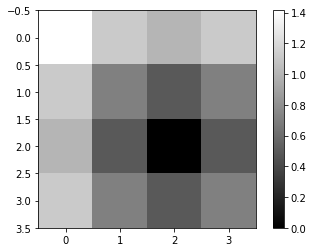

In [204]:
%matplotlib inline
import matplotlib.pyplot as plt

#Here, the matplotlib function 'imshow' was used
# to create an image plot from a 2D array of function values
plt.imshow(z, cmap=plt.cm.gray);
plt.colorbar()

上面，我们只使用了很“疏”的点，接下来，我们尝试使用很密集的点，这样有利于我们可视化sqrt(x^2+y^2)这个函数。

[-1.    -0.999 -0.998 ...,  0.997  0.998  0.999]
[[ 1.41421356  1.41350663  1.41280006 ...,  1.41209384  1.41280006
   1.41350663]
 [ 1.41350663  1.41279935  1.41209242 ...,  1.41138584  1.41209242
   1.41279935]
 [ 1.41280006  1.41209242  1.41138514 ...,  1.41067821  1.41138514
   1.41209242]
 ..., 
 [ 1.41209384  1.41138584  1.41067821 ...,  1.40997092  1.41067821
   1.41138584]
 [ 1.41280006  1.41209242  1.41138514 ...,  1.41067821  1.41138514
   1.41209242]
 [ 1.41350663  1.41279935  1.41209242 ...,  1.41138584  1.41209242
   1.41279935]]


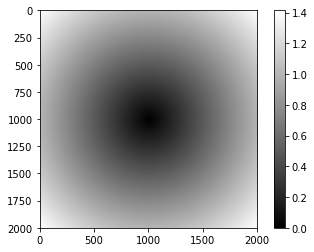

In [205]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

arr1=np.arange(-1,1,0.001)
print(arr1)

xs1,ys1=np.meshgrid(arr1,arr1)
#print(xs)

z1 = np.sqrt(xs1**2+ys1**2)
print(z1)

plt.imshow(z1, cmap=plt.cm.gray)
plt.colorbar()


### 将条件逻辑表述为数组运算

Expressing conditional logic as array operations

numpy.where 函数是三元表达式 x if condition else y 的矢量化版本。假设我们有一个boolean 数组和两个值数组。


In [206]:
import numpy as np

xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])


假设我们想要根据 cond 中的值来决定我们是选取 xarr 还是 yarr 的值。当 cond 中的值为 True 时，我们选取 xarr 中的值，否则选用 yarr 中的数值。

python中列表推导式的写法如下所示：

In [215]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]

print(result)

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]


It has multiple problems here. First, it will not be fast for large arrages (because all the work is being done in interpreted python code,即纯python处理)；second, it will not work with multidimensional array,即无法处理多维数组。

如果我们使用 np.where，we can wirte this code very concisely：

In [213]:
result_where = np.where(cond, xarr, yarr)
print(result_where)

[ 1.1  2.2  1.3  1.4  2.5]


np.where的第二个和第三个参数不必是数组，它们可以是标量。在数据分析工作中，where 通常用于根据另一个数组而产生一个新的数组。假设有一个由随机数据组成的矩阵，我们想将所有正的值替换为2，所有负值改为-2。那么我们可以写为：

In [221]:
from numpy.random import randn
import numpy as np

arr_a = randn(10)
print(arr_a)

arr_b = np.where(arr_a <0, -2, 2)
print(arr_a)
print(arr_b)

[ 0.62270907  0.78005326  1.33905462 -0.28364167  0.25905141 -1.32440256
 -0.21494045  0.73410962 -1.03440381  0.39516074]
[ 0.62270907  0.78005326  1.33905462 -0.28364167  0.25905141 -1.32440256
 -0.21494045  0.73410962 -1.03440381  0.39516074]
[ 2  2  2 -2  2 -2 -2  2 -2  2]


如果我们只需要把负的值改为 -3， 那么我们可以用

In [223]:
arr_c = np.where(arr_a < 0, -3, arr_a)
print(arr_c)

[ 0.62270907  0.78005326  1.33905462 -3.          0.25905141 -3.         -3.
  0.73410962 -3.          0.39516074]


** Highlight：** 我们可以使用where表现更加复杂的逻辑。想象这样一个例子：有两个boolean array，分别叫做cond1和conda2，希望使用四种不同的布尔值组合实现不同的赋值操作.

如果我们不用where，那么这个pseudo code 的逻辑大概如下

虽然不是那么容易看出来，我们可以使用 where 的嵌套来实现上述的pseudocode逻辑

np.where(conda1 & conda2, 0,
         np.where(conda1, 1,
                 np.where(conda2, 2, 3)))

在这个特殊的例子中，我们还可以利用“布尔值在计算过程中被当作0或者1处理”这个事实，将上述result的结果改写成

In [ ]:
result = 1*（cond1 - cond2) + 2 *(cond2 & -cond1) + 3*-(cond1|cond2)
#这种写法我觉得并不是太推荐，在2017年的新版中，原作者写删除了这部分的讨论

现在我们来应用下上面的嵌套np.where

In [13]:
import numpy as np
from numpy.random import randn

x1 = randn(10)
y1 = randn(10)
cond1 = np.where(x1<0, True, False)
cond2 = np.where(y1>0, True, False)

result=np.where(cond1 & cond2, 0,
               np.where(cond1, 1,
                       np.where(cond2, 2, 3)))

print(result)

[2 2 0 3 3 3 2 3 3 0]


### 数学和统计方法 Mathematical and Statical Methods

我们可以使用数组上的一套数学函数对整个数组或者数组的某个轴向上的数据进行统计计算。You can use aggregations (often called reductions) like 'sum', 'mean', and 'std' either by calling the array instance method or using the top-level Numpy function.


[[ 0.54799787  1.33791764 -0.11138659  0.72525525]
 [ 1.49735063  0.39938058  2.1470285   1.71167333]
 [-1.2794806  -1.33813428 -0.46592582 -0.2428219 ]
 [-0.0876336   0.08844033 -1.68480333 -0.51118728]
 [ 0.75762214 -0.0847792  -0.86674338 -0.8463928 ]]


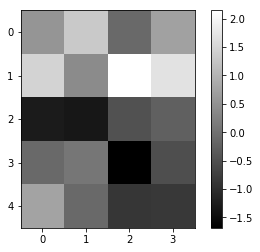

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

arr = np.random.randn(5,4)
print(arr)

plt.imshow(arr, cmap=plt.cm.gray)
plt.colorbar()

In [30]:
arr[0,2]

-0.11138658615513938

In [31]:
arr[0,3]

0.72525524888898074

上面代码中，我产生了一些 enormally distributed random data，并且用imshow function 把这个二维数组给画了出来。我们可以使用 aggregate statistics 做一些计算. （其实我在前面已经用到过了这些 array 实例方法。

In [23]:
arr.mean() #这里的使用方法就是作为 array instance method

0.084668874323083121

In [24]:
np.mean(arr) # 这里的使用方法就是 top-level Numpy function

0.084668874323083121

In [25]:
arr.sum()

1.6933774864616624

mean 和 sum 这类的函数可以接受一个 axis 参数 （用于计算该轴向上的统计值），最终结果是一个相对于原数组少了一维的数组：

In [28]:
arr.mean(axis=1) # compute mean across the columns

array([ 0.62494604,  1.43885826, -0.83159065, -0.54879597, -0.26007331])

In [32]:
arr.mean(axis = 0 )  # compute mean down the rows

#如果对axis = 0 和 axis = 1 两个结果的列数有不解，
# 可以回顾一下前面的二维数组的索引方式
# 特别是那个 NumPy 数组元素索引的图，那个图上描述了 axis1 和 axis0 的相对朝向。

array([ 0.28717129,  0.08056501, -0.19636612,  0.16730532])

其他如 ‘cumsum’， ‘cumprod’ 这类函数方法并不聚合，而是产生一个由中间结果组成的数组：

English: Other methods like cumsum and cumprod donot aggregate, instead producing an array of the intermediate results:

In [39]:
arr1 = np.array([0,1,2,3,4,5,6,7])
arr1.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In multidimensional arrays, accumulation functions like cumsum return an array of the same size, but with the partial aggregates computed along the indicated axis according to each lower dimensional slice:

In [36]:
arr2 = np.array([[0,1,2],[3,4,5],[6,7,8]])

In [37]:
arr2.cumsum(0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

### 用于Boolean数组的方法

在上述方法中，布尔值会被强制转换为 1 （True） 和 0 （False）。因此，sum 经常被用来对Boolean数组中的True值计算：

In [2]:
import numpy as np
from numpy.random import randn

arr = randn(100)
print(arr)

(arr>0).sum() # 正值的个数

[-1.59179055 -0.67135552  0.46747631  1.02023236 -0.1209069  -0.23796103
  1.70086923 -1.30103227  0.96948357 -0.54897524  1.19927847  0.27833608
  0.31414882  0.02175331  0.09384374 -1.34922611  1.85648633 -0.7596968
  0.55289003 -1.08700292 -1.32265535  0.21444019  1.34924842  1.21907193
  1.72108007 -0.26934689 -0.37714608 -0.85151037  0.70476724  3.12008429
 -0.70734385 -0.67314969 -1.83431969 -1.16418465  0.22718223  0.10864632
 -0.8746276  -0.16304716 -0.2357636   1.21976641  2.74049789  0.67025444
 -0.45440473  0.46034605 -0.72061832 -1.96345802 -0.07263667  1.78164858
  1.03646217 -0.75574067  0.77127926  1.31745028 -1.0420359   1.07266162
 -1.71935633  2.73546895 -0.68484304  1.28096539  0.41984534 -0.57732743
  1.88375367 -0.91913149 -0.06357673 -0.07244408  1.33632037 -0.21669299
  0.8139073  -1.03860804  0.02574768  0.45922854 -0.48372651 -0.82484947
 -0.5052303   0.91117498  0.55400099  0.36170363 -0.94826478 -2.23508065
  0.00674751 -2.13981905 -0.96179442 -0.2276698  -0.

48

另外还有两个方法 any 和 all，它们对 Boolean array 很有用。any用于测试数组中是否存在一个或多个True，而all则检查数组中所有值是否都是True。

In [3]:
bools = np.array([False, False, True, False])

In [4]:
bools.any() # any of them if True, then the return result is True

True

In [5]:
bools.all() # all of them should be True, otherwise the return result is False

False

### 排序 Sorting

跟Python内置的列表一样，NumPy 数组也可以通过 sort 方法就地排序

In [8]:
import numpy as np
from numpy.random import randn 

arr_a = randn(8)
print(arr_a)

[-0.686669   -1.48438999  0.65638798 -0.39998726  0.74326087  1.24886107
  0.89035309 -0.48631274]


In [10]:
arr_a.sort() # 注意，它将直接改变数组本身
print(arr_a)

[-1.48438999 -0.686669   -0.48631274 -0.39998726  0.65638798  0.74326087
  0.89035309  1.24886107]


对于多维数组，只要我们给定确定的轴编号，它就会沿着特定的轴进行排序。我们这里拿一个二维数组举例

In [43]:
import numpy as np

arr_b = randn(4,5)
print(arr_b)
arr_c = arr_b.copy()

print('\n')

print(arr_c)

[[ 0.65088366 -1.05375078  1.56420896  1.34571518  1.71802975]
 [-2.37803     1.81828452 -1.95749888 -0.59615448 -0.59094405]
 [-0.67341795 -0.20278108 -0.25520173 -1.59662012  0.19157298]
 [-1.27263214 -0.12162012  0.00515139 -1.26608186  1.82123804]]


[[ 0.65088366 -1.05375078  1.56420896  1.34571518  1.71802975]
 [-2.37803     1.81828452 -1.95749888 -0.59615448 -0.59094405]
 [-0.67341795 -0.20278108 -0.25520173 -1.59662012  0.19157298]
 [-1.27263214 -0.12162012  0.00515139 -1.26608186  1.82123804]]


In [44]:
arr_b.sort(1) # 这里我们沿着 axis = 1 方向进行排序，我们发现每个一位数组中的元素都被排序了
print(arr_b)

[[-1.05375078  0.65088366  1.34571518  1.56420896  1.71802975]
 [-2.37803    -1.95749888 -0.59615448 -0.59094405  1.81828452]
 [-1.59662012 -0.67341795 -0.25520173 -0.20278108  0.19157298]
 [-1.27263214 -1.26608186 -0.12162012  0.00515139  1.82123804]]


In [45]:
arr_c[2].sort() #这里我们只选择了编号为2的那个一维数组进行排序
print(arr_c)

[[ 0.65088366 -1.05375078  1.56420896  1.34571518  1.71802975]
 [-2.37803     1.81828452 -1.95749888 -0.59615448 -0.59094405]
 [-1.59662012 -0.67341795 -0.25520173 -0.20278108  0.19157298]
 [-1.27263214 -0.12162012  0.00515139 -1.26608186  1.82123804]]


The top-level method 'np.sort' returns a sorted copy of an array instead of modifying the array in-place. 这个需要我们区分 np.sort 和数组实例 sort 的地方。

In [48]:
np.sort(arr_c)
print(arr_c,  '\n')
print(np.sort(arr_c))

[[ 0.65088366 -1.05375078  1.56420896  1.34571518  1.71802975]
 [-2.37803     1.81828452 -1.95749888 -0.59615448 -0.59094405]
 [-1.59662012 -0.67341795 -0.25520173 -0.20278108  0.19157298]
 [-1.27263214 -0.12162012  0.00515139 -1.26608186  1.82123804]] 

[[-1.05375078  0.65088366  1.34571518  1.56420896  1.71802975]
 [-2.37803    -1.95749888 -0.59615448 -0.59094405  1.81828452]
 [-1.59662012 -0.67341795 -0.25520173 -0.20278108  0.19157298]
 [-1.27263214 -1.26608186 -0.12162012  0.00515139  1.82123804]]


数组 sort 的应用之一，就是确定数组的分位数(quantile)。

A quick-and-dirty way to compute the quantiles of an array is to sort it, and select the value at a particular rank.

In [57]:
short_arr = randn(10)
short_arr.sort()
print(short_arr, '\n', len(short_arr))

[-1.70387448 -1.18648567 -0.47025011 -0.31637978 -0.1649244   0.27546119
  0.40603575  0.48068742  1.34248461  1.77773148] 
 10


In [52]:
short_arr[int(0.1*len(large_arr))] #(处于0.1分位数位置上)

-0.70275636795375984

In [53]:
short_arr[int(0*len(large_arr))] #（处于0分位上）

-1.8710505244141589

上面我们只是使用了很小的数组，我们一眼就可以看出各分位数上的数值；当数组变得很大时候，才能凸显出 sort 的便捷。例如：

In [56]:
large = randn(2000)
large.sort()
large[int(0.5*len(large))]

0.034709062946247475

关于 NumPy 排序方法以及诸如间接排序之类的高级技术，我们在第12章还会详细的讨论，在 Pandas 中也有一些特别的排数技术。

### Unique and Other Set Logic 唯一化以及其他集合逻辑

NumPy 提供了一些针对**一维**ndarray的基本集合运算。其中可能最常用的是 np.unique，它用于找出数组中的唯一值(也就是说这个值在数组中只有一个)并返回已排序的结果。

In [58]:
import numpy as np

names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

np.unique(names)

array(['Bob', 'Joe', 'Will'],
      dtype='<U4')

In [59]:
ints = np.array([3,3,41,4424,523,523,22,22,43]
               )
np.unique(ints)

array([   3,   22,   41,   43,  523, 4424])

我们可以拿着与 np.unique 等价的纯python代码来比较一下（Contrast no.unique with the pure Python alternative:)

In [60]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [61]:
sorted(set(ints))

[3, 22, 41, 43, 523, 4424]

Anotehr function, np.in1d, tests membership of the values in one array in another, returning a boolean array.

另一个函数np.in1d用于测试一个数组的值在另一个数组中的成员资格，返回一个Boolean array


In [64]:
values = np.array([6,623,43,22,3])
np.in1d(values,[6,43,22])

array([ True, False,  True,  True, False], dtype=bool)

这里给出一些 NumPy 中的基本集合函数（set function）

#### Array set operations
|函数|说明|
|------|-----|
|unique(x)|计算x中的唯一元素，并返回有序结果|
|intersect1d(x,y)|计算x和y的公共元素，并且返回有序结果|
|union1d(x,y)|计算x和y的并集，并返回有序结果|
|in1d(x,y)|得到一个表示“x的元素是否包含于y”的布尔型数组|
|setdiff1d(x,y)|集合的差，即元素在x中且不在y中|
|setxor1d(x,y)|集合的对称差，即存在于一个数组中但不同时存在于两个数组中的元素，相当于是异或|

In [67]:
np.unique(values)

array([  3,   6,  22,  43, 623])

In [68]:
np.intersect1d([3,6],[3,22,43])

array([3])

In [70]:
np.union1d([3,6],[3,22,43])

array([ 3,  6, 22, 43])

In [71]:
np.in1d([3,6],[3,22,43])

array([ True, False], dtype=bool)

In [72]:
np.in1d([3,6],[3,6,22])

array([ True,  True], dtype=bool)

In [79]:
np.setdiff1d([3,22,6],[6])

array([ 3, 22])

In [81]:
np.setxor1d([3,22,6],[6])

array([ 3, 22])

## File Input and Output with Arrays 用于数组的文件输入输出

NumPy 可以用来读写磁盘中的文本数据和二进制数据。在这个章节中，我们将只讨论 NumPy 内建的二进制格式，这主要是因为大部分python用户更喜欢用pandas和其他工具来读取文本和表格数据，这在之后的章节中会进行讨论

### 将数组以二进制格式保存到磁盘

np.save 和 np.load 是读写磁盘数组数据的两个主要函数。默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为 .npy 的文件中的。

In [82]:
import numpy as np

arr_c = np.arange(10)
np.save('./chapter04/some_array',arr_c)

ru如果文件路径末尾没有扩展名 .npy，那么这个扩展名会被自动补全。然后就可以通过 np.load 读取磁盘上的数组：

In [86]:
np.load('./chapter04/some_array.npy') # 注意，需要指明文件后缀名。

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

通过 np.savez 可以将多个数组保存到一个uncompressed npz文件中（注意原书和中文翻译的第一版都把这个npz说成了是压缩文件，这个是错误的，但是原作者第二版，即利用python 3的版本已经更正了，我也查阅了 NumPy 的文档，np.savez保存的并不是压缩文件，如果要压缩文件，可以使用 np.savez_compressed），将数组以**关键字参数**的形式传入即可：

In [87]:
np.savez('./chapter04/array_archive.npz', a = arr_c, b = arr_c)

In [101]:
np.savez_compressed('./chapter04/array_compressed.npz', a1 = arr_c,
                   b1 = arr_c)

When loading an .npz file, we get back a dict-like object （我们得到的是一个类似字典的对象）that laods the individual arrays lazily (该对象会对各个数组进行延迟加载)

In [88]:
arch = np.load('./chapter04/array_archive.npz')

In [89]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [104]:
arch = np.load('./chapter04/array_compressed.npz')

In [105]:
arch['b1']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 存取文本文件

从文件加载文本是个很标准的python任务，不过python的文件读写函数很容易另初学者搞糊涂，因此这里我们主要介绍 pandas 中的 read_csv 和 read_table 函数。有时，我们需要用到 np.loadtxt 或者 更为专门化的 np.genfromtxt 将数据记载到普通的 NumPy 数组中。

这些函数都有许多选项可供使用：指定各种分隔符、针对特定列的转换器函数、需要跳过的行数等。这里，以一个简单的逗号分割文件 （CSV) 作为 
example：

In [90]:
!cat ./chapter04/array_ex.txt #for windows system, use !type

0.580052,0.186730,1.040717,1.134411
0.194163,-0.636917,-0.938659,0.124094
-0.126410,0.268607,-0.695724,0.047428
-1.484413,0.004176,-0.744203,0.005487
2.302869,0.200131,1.670238,-1.881090
-0.193230,1.047233,0.482803,0.960334


该文件可以被加载到一个二维数组中，如下所示：

In [93]:
arr = np.loadtxt('chapter04/array_ex.txt', delimiter = ',')
arr

array([[ 0.580052,  0.18673 ,  1.040717,  1.134411],
       [ 0.194163, -0.636917, -0.938659,  0.124094],
       [-0.12641 ,  0.268607, -0.695724,  0.047428],
       [-1.484413,  0.004176, -0.744203,  0.005487],
       [ 2.302869,  0.200131,  1.670238, -1.88109 ],
       [-0.19323 ,  1.047233,  0.482803,  0.960334]])

In [94]:
print(arr)

[[ 0.580052  0.18673   1.040717  1.134411]
 [ 0.194163 -0.636917 -0.938659  0.124094]
 [-0.12641   0.268607 -0.695724  0.047428]
 [-1.484413  0.004176 -0.744203  0.005487]
 [ 2.302869  0.200131  1.670238 -1.88109 ]
 [-0.19323   1.047233  0.482803  0.960334]]


np.savetxt 执行的是相反的操作：将数组写到以某种分隔符分开的文本文件中去。 genfromtxt 跟 loadtxt 差不多，只不过它面向的是结构化数组和缺失数据处理。在12章中，我们还会仔细讨论结构化数组的知识。

In [96]:
np.savetxt('./chapter04/array_ex-savetxt.txt', arr)

In [97]:
!cat chapter04/array_ex-savetxt.txt

5.800520000000000120e-01 1.867300000000000071e-01 1.040716999999999892e+00 1.134411000000000058e+00
1.941630000000000023e-01 -6.369169999999999554e-01 -9.386590000000000211e-01 1.240939999999999960e-01
-1.264099999999999946e-01 2.686069999999999847e-01 -6.957240000000000091e-01 4.742799999999999794e-02
-1.484412999999999982e+00 4.176000000000000024e-03 -7.442029999999999479e-01 5.486999999999999690e-03
2.302868999999999833e+00 2.001310000000000033e-01 1.670237999999999889e+00 -1.881089999999999929e+00
-1.932300000000000129e-01 1.047233000000000080e+00 4.828029999999999822e-01 9.603340000000000209e-01


### Linear Algebra

Linear algebra, like matrix multiplication, decompisitions, determinants, and other square matrix math, is an important part of any array library. Unlike MATLAB, multiplying two two-dimensional arrays with * is an element-wise product instead a matrix dot product. Thus, there is a function 'dot', both an array method and a function in the numpy namespace, for matrix multiplication:

In [106]:
x = np.array([[1., 2., 3.],[4., 5., 6.]])
y = np.array([[6.,23.,], [-1, 7], [8, 9]])

In [107]:
x

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [108]:
y

array([[  6.,  23.],
       [ -1.,   7.],
       [  8.,   9.]])

In [109]:
x.dot(y)

array([[  28.,   64.],
       [  67.,  181.]])

** x.dot(y) is equivalent to np.dot(x,y) **

In [111]:
import numpy as np

np.dot(x,y)

array([[  28.,   64.],
       [  67.,  181.]])

A matrix product between a 2D array and a suitably sized 1D array result in a 1D array:

In [114]:
np.dot(x, np.ones(3))

array([  6.,  15.])

In [6]:
import numpy as np

x1 = np.array([[2,2],[3,3]])
y1 = np.array([[1,1],[1,1]])

dotvalue1=x1.dot(y1)
dotvalue2=np.dot(x1,y1)

print('dotvalue1 = \n', dotvalue1, '\n' 'dotvalue2 = \n', dotvalue2)

dotvalue1 = 
 [[4 4]
 [6 6]] 
dotvalue2 = 
 [[4 4]
 [6 6]]


numpy.linalg 中有一组标准的矩阵分解运算以及诸如求逆行列式之类的东西。它们跟 matlab 和 R 等语言所使用的是相同的行业标准级 Fortran 库，如 BLAS、LAPACK、Intel MKL （可能有，这个取决于所使用的 NumPy 版本）等：

In [9]:
from numpy.linalg import inv, qr
from numpy.random import randn

In [14]:
X = randn(5,5)

In [15]:
mat = X.T.dot(X)

In [16]:
inv(mat)

array([[  13.61264377,  -20.48004771,  -26.69244787,  -76.69312951,
         -67.51311112],
       [ -20.48004771,   32.48637641,   43.53408302,  125.15227318,
         111.1364601 ],
       [ -26.69244787,   43.53408302,   60.05481741,  172.48259485,
         153.90136204],
       [ -76.69312951,  125.15227318,  172.48259485,  497.21089245,
         443.06150168],
       [ -67.51311112,  111.1364601 ,  153.90136204,  443.06150168,
         395.82792169]])

In [17]:
mat.dot(inv(mat))

array([[  1.00000000e+00,   8.38024821e-14,   3.45415329e-15,
         -4.48749780e-14,  -7.93199001e-14],
       [ -3.02546232e-14,   1.00000000e+00,   5.99086904e-14,
          3.86950015e-14,   6.90391028e-15],
       [  4.04028403e-14,  -3.19824576e-14,   1.00000000e+00,
          1.46445096e-14,  -8.54405306e-14],
       [  4.97631250e-15,   3.29985529e-16,   4.25498870e-15,
          1.00000000e+00,  -2.46451372e-14],
       [ -1.20513088e-14,  -2.87408913e-14,   1.80600476e-14,
         -2.69176359e-14,   1.00000000e+00]])

In [23]:
q, r = qr(mat) 
# QR decomposition is decomposition of a matrix A into a product
# A = Q R
# where Q is an orthogonal matrix, and R is upper triangular matrix

In [24]:
q

array([[-0.64817633,  0.02561783,  0.29295974,  0.69412159, -0.10761495],
       [-0.60874474, -0.5848402 , -0.33752007, -0.37694811,  0.17714995],
       [-0.24801037,  0.67180353, -0.65100601,  0.05640753,  0.24531661],
       [-0.1685863 ,  0.25354665,  0.56632534, -0.29631434,  0.7062338 ],
       [ 0.345495  , -0.37643031, -0.23605418,  0.53396755,  0.63094414]])

In [26]:
q.dot(q.T) # we can see that the result is an unit matrix

array([[  1.00000000e+00,   1.15810800e-16,   4.76715252e-17,
          1.08060139e-16,  -6.65514256e-17],
       [  1.15810800e-16,   1.00000000e+00,  -1.81671454e-16,
         -7.75809722e-17,   1.48805387e-18],
       [  4.76715252e-17,  -1.81671454e-16,   1.00000000e+00,
          1.50048380e-16,  -1.10879070e-16],
       [  1.08060139e-16,  -7.75809722e-17,   1.50048380e-16,
          1.00000000e+00,  -2.90322197e-17],
       [ -6.65514256e-17,   1.48805387e-18,  -1.10879070e-16,
         -2.90322197e-17,   1.00000000e+00]])

In [27]:
r

array([[ -7.55859662e+00,  -7.20255145e+00,  -4.38146791e+00,
         -2.08689039e+00,   4.77339208e+00],
       [  0.00000000e+00,  -2.62580508e+00,   6.76557933e+00,
          9.30688813e-01,  -2.93596773e+00],
       [  0.00000000e+00,   0.00000000e+00,  -3.88678976e+00,
          1.30650094e+00,   4.82177056e-02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -6.98712636e-01,   7.83438005e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.59398593e-03]])

这里，我对常用 numpy.linalg 函数进行一些案例对说明，原书利用了一个表格，但是我自己为了看这本书也重复写了几个表格了，记忆情况并不佳，可能还是一个函数一个例子对这种方法更加容易让人记忆深刻一些。（2017/12/25）

|函数|说明|
|---|---|
|diag|以一维数组的形式返回方阵的对角线（或非对角线）元素|

In [38]:
import numpy as np
from numpy.random import randn

arr_d = np.arange(10)
arr_e= randn(16).reshape(4,4)
print(arr_d, '\n', arr_e)

[0 1 2 3 4 5 6 7 8 9] 
 [[ 0.14153677  0.24672233  0.50749348  0.78284329]
 [-0.48261042 -1.25726554  0.50620021  0.03037918]
 [-0.46897981  0.09101614  1.22069536  0.96267158]
 [ 1.20173702  0.69252191 -0.50665558  0.35445833]]


In [32]:
np.diag(arr_d) # 对于1D array，它将转化为一个对角化的矩阵

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 9]])

In [41]:
np.diag(arr_e) #当diag作用在一个2D以上数组时，则返回对角线上的元素。

array([ 0.14153677, -1.25726554,  1.22069536,  0.35445833])

|函数|说明|
|---|---|
|dot|matrix multiplication, 矩阵乘法|

这已经在前面举过例子，这里略了。

|函数|说明|
|---|---|
|trace|计算对角线元素的和|

In [51]:

np.trace(arr_e)

0.45942492515754818

In [55]:
np.trace(np.diag(arr_d))

45

In [72]:
arr_f = np.arange(64).reshape(4,4,4)
print(arr_f
     )

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]]

 [[48 49 50 51]
  [52 53 54 55]
  [56 57 58 59]
  [60 61 62 63]]]


In [82]:
np.trace(arr_f[1]) 
#可以看到对于多维数组，我们还可以对其中低维度的求trace

94

|函数|说明|
|---|---|
|det|计算矩阵的行列式|

In [58]:
from numpy.linalg import det

det(arr_e)

0.18107742464016677

|函数|说明|
|---|---|
|eig|计算方阵的本征值和本征向量|

In [90]:
import numpy as np
from numpy.linalg import eig

eig(arr_e) 
# computes the eigenvalues and eigenvectors of a square matrix
#关于这个函数的数学含义，请参考线性代数相关的书籍

(array([ 1.31378888,  0.55892151, -0.20390335, -1.20938212]),
 array([[-0.56338088,  0.15855215, -0.52026815,  0.00583235],
        [-0.04603386,  0.17989043, -0.02627216,  0.91999686],
        [-0.75037304,  0.82709686, -0.58783776,  0.11506836],
        [-0.34267065, -0.50834184,  0.61893262, -0.37460785]]))

|函数|说明|
|---|---|
|inv|计算方阵的逆|

In [111]:
from numpy.linalg import inv
# if 'a' is a matrix object,
# the return value is  a matrix as well
a = np.array([[1., 2.], [3., 4.]])
ainv = inv(a)
print(a, '\n', ainv)

[[ 1.  2.]
 [ 3.  4.]] 
 [[-2.   1. ]
 [ 1.5 -0.5]]


In [123]:
# inverses of several matrices can be computed at once:

b = np.array([
    [
        [1.,2.],[3., 4.]
    ],
    [
        [1., 3.],[3., 5.]
    ]
])

binv = inv(b)
binv

array([[[-2.  ,  1.  ],
        [ 1.5 , -0.5 ]],

       [[-1.25,  0.75],
        [ 0.75, -0.25]]])

|函数|说明|
|---|---|
|pinv|计算矩阵的Moore-Penrose伪逆|

Compute the Moore-Penrose pseudo-inverse of a matrix: The pseudo-inverse of a matrix $A^+$, is defined as "the matrix that 'sloves' \[the least-squares problem \] Ax = b," i.e., if $\bar{x}$ is said solution, then $A^+$ is that matrix such that $\bar{x}$ = $A^+$b

For more information, please refere to linear algebra books


In [128]:
from numpy.linalg import pinv
from numpy.random import randn

c = randn(9,6)
bpinv = pinv(c)
bpinv

array([[ 0.06773754,  0.08507231,  0.03599627, -0.01853751,  0.16836754,
         0.32422249, -0.19299801, -0.31214797,  0.00967845],
       [ 0.12281894,  0.07072531, -0.01564354,  0.20229272,  0.06937971,
         0.35972493, -0.01448229,  0.04414476, -0.10160079],
       [ 0.05654632,  0.03984649,  0.04295347, -0.17028519, -0.01901007,
         0.28627894,  0.18913188, -0.06274545, -0.12377407],
       [-0.08695367,  0.14834704, -0.0341646 ,  0.22099777,  0.0121695 ,
         0.16113492,  0.14330299,  0.02716768,  0.07349941],
       [-0.23075762, -0.21022799,  0.02107068,  0.05484976,  0.07970739,
         0.02392973, -0.13324177,  0.01581333,  0.12303737],
       [ 0.02666583, -0.00556883, -0.04224332, -0.16019517, -0.29159971,
         0.20787059, -0.31678073, -0.03955117, -0.12349681]])

|函数|说明|
|---|---|
|qr|copute the QR decompisition|

上面提过了，此处略

|函数|说明|
|---|---|
|svd|计算奇异值分解， compute the singular value decomposition SVD|

In [134]:
import numpy as np
from numpy.random import randn

a = randn(9,6) + 1j*randn(9,6)
a

array([[ 0.19572579-0.87029087j, -0.60549441+0.03041961j,
         0.53717832-0.21724017j,  0.30269892-0.84562435j,
        -0.37805911-1.16670987j,  1.40483549+1.05136081j],
       [-0.41925141-0.59262396j,  0.57007689+0.27948498j,
        -0.33784746+2.02733244j, -0.16667473+1.18833459j,
        -2.05857223-0.42475995j, -0.51716667+0.58828809j],
       [-0.51681391+0.76518273j,  1.66331232-0.02243564j,
         0.67538352+1.05061539j, -0.47478320-1.00037102j,
         0.57047964+1.19825362j, -0.62609923+0.88788796j],
       [-0.86143443-0.10832312j,  0.38955665+2.07086752j,
         0.29747269+0.28910785j,  0.80404689+0.02266389j,
        -0.36262792-1.53504836j, -1.07614472-0.77102653j],
       [-1.39075471+0.27642931j, -0.26640283+0.48496716j,
        -1.15813836-1.72530638j, -0.10336659+1.05835178j,
        -0.59061803+0.2206382j , -0.42625891-1.86808676j],
       [ 0.30386753+0.54827119j,  0.44488527-0.29553596j,
         0.60638619+1.00588998j, -1.27784589+0.49197585j,
        -

In [135]:
# Reconstruction based on full SVD
# factors the matrix a as u * np.diag(s) * V,
# where u and v are unitary and s is a 1D array of a's 
# singular values

U, s, V = np.linalg.svd(a, full_matrices = True)
U.shape, s.shape, V.shape

((9, 9), (6,), (6, 6))

In [139]:
s

array([ 6.51168824,  5.40852193,  3.73999941,  3.14045021,  2.60827859,
        1.38673675])

|函数|说明|
|---|---|
|solve|计算方程组 Ax = b， 其中 A 为一个方阵|

Note：The solutions are computed using LAPACK routine_gesv. 'a' must be square and of full-rank, i.e., all rows (or, equivalently, columns) must be linearly independent; if either is not true, use lstsq for the least-squares best 'solutions' of the system/equation.

In [141]:
# Solve the systems of equatons 3* x0 + x1 = 9 and x0 + 2*x1 =8

from numpy.linalg import solve
a = np.array([[3,1],[1,2]])
b = np.array([9,8])
x = solve(a,b)

In [142]:
a

array([[3, 1],
       [1, 2]])

In [143]:
b

array([9, 8])

In [144]:
x

array([ 2.,  3.])

In [145]:
# check that the solution is correct:
np.allclose(np.dot(a, x), b)

True

|函数|说明|
|---|---|
|lstsq|计算方程组 $ax = b$ 的最小二乘解|

numpy.linalg.lstsq(a, b, rcond=-1)

Return the equation $a$ $x$ = $b$ by computing a vector $x$ that minimizes the Eouliden 2-norm $ ||b - ax ||^2$. The equation may be under-, over-, or well-determined (i.e. the numer of linearly independent rows of $a$ can be less less, greater, or less than its number of linearly independent columns). If $a$ is square and of full rank, then $x$ (but for round-off error) is the "exact" solution of the equation. (reivsed on the content from scipy.org)

#Fit a line, $y = mx + c$, through some noisy data-points:

In [147]:
x = np.array([0,1,2,3])
y = np.array([-1, 0.2, 0.9, 2.1])

通过查看上面x和y的点，我们可以发现这个曲线的大概斜率在1左右，而在y轴上的cut off在-1左右。

我们可以重新写一下上面这个线性方程：$y$ = A p, 此处 A = \[ [x, 1] \] 并且 p = \[[m], [c]\]。现在我们使用 lstsq 去解 p







In [152]:
A = np.vstack([x, np.ones(len(x))]).T 
# np.vstack 可以按顺序把array堆叠在一起
# 此处是把 x 和 np.ones(4) 堆在了一起

In [153]:
A #即 A = [[x, 1]]

array([[ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.]])

In [155]:
from numpy.linalg import lstsq

m, c = lstsq(A, y)[0]
print(m, c)

1.0 -0.95


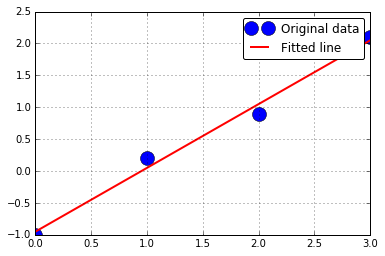

In [173]:
# 我们把数据和拟合的线可以画出来

####basic settings started
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = '1' 
#if choose the grey backgroud, use 0.75
mpl.rcParams['figure.figsize'] = [6.4,4.8]
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['legend.fancybox'] = True
#####basic settings finished


%matplotlib inline 
# plot inline jupyter
import matplotlib.pyplot as plt

# plot orginal data (i.e. four points)
plt.plot(x, y, 'o', label = 'Original data', ms =14)
# plot the fitted line using red line style and linewidth = 2
plt.plot(x, m*x + c, 'r', lw=2, label = 'Fitted line')
# plot the legend
plt.legend()
# plot grid
plt.grid()
plt.show()

In [194]:
#因为上面用到了 numpy.stack,那么我就顺便再举一个例子来说明 vstack 的用法
# 与 vstack 相反的操作是 vsplit

import numpy as np

a = np.array([1,2,3])
b = np.array([4,5,6])
ab = np.vstack((a, b))
m, n= np.vsplit(ab, 2)  # 把ab分成2个，分别存在在m和n中


print(ab)

print(m)

[[1 2 3]
 [4 5 6]]
[[1 2 3]]


## 随机数生成 Pseudorandom Number Generation

numpy.random 模块对 PYthon 内置对 random 进行了补充，增加了一些搞笑生成随机样本对函数。例如，我们可以用normal来得到一个标准正态分布对 4 * 4 样本数组： 

In [9]:
import numpy as np

samples = np.random.normal(size=(4,4))

In [10]:
samples

array([[-0.28391827, -0.81224234,  0.31833024, -1.74116349],
       [ 1.33771267, -1.55416057,  0.31248105, -1.08338403],
       [ 0.42729757,  1.06271723, -0.4941102 ,  0.47104661],
       [ 0.02768592, -0.11306022,  0.20251955, -0.6375925 ]])

与此对比地，在python对内置random函数中，一次只能生成一个样本值。下面我们就来对比下这两种方法对区别，我们将会看到 numpy中对模块有更优越对效率：

In [11]:
from random import normalvariate

N = 1000000

In [12]:
%timeit samples = [normalvariate(0,1) for _ in range(N)]
#中文翻译版本中这行代码是错的，翻译者写成了 xrange


629 ms ± 28.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%timeit np.random.normal(size=N)

25.8 ms ± 843 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


下表列出了 numpy.random 中的部分函数。在下一节中，我门将给出一些利用这些函数一次性生成大量样本值的案例。

|函数|说明|
|---|---|
|seed|确定随机数生成器的种子|
|permutation|返回一个序列的随机排列或返回一个随机排列的范围|
|shuffle|对一个序列就地随机排列|
|rand|产生均匀分布的样本值|
|randint|从给定的上下限范围内随机选取整数|
|randn|产生正态分布（平均值为0，标准差为1）的样本值，类似于matlab接口|
|binomial|产生二项分布的样本值|
|normal|产生正态（高斯）分布的样本值|
|beta|产生Beta分布的样本值|
|chisquare|产生卡方分布的样本值|
|gamma|产生Gamma分布的样本值|
|uniform|产生在\[0,1)中均匀分布的样本值|

## 范例：随机漫步 random walks

随机漫步是说明数组操作最好的案例之一。现在，我们来考虑一个简单的随机漫步：我们从0开始，并且以1或者-1作为step width，1和-1出现的概率是均等的。然后我们走1000步，我们可以看看我们会走出什么样的轨迹

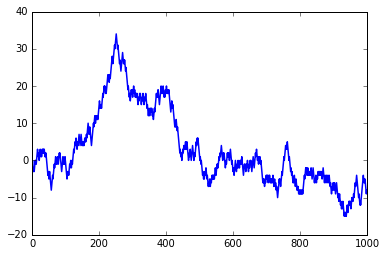

In [41]:
####basic settings started
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = '1' 
#if choose the grey backgroud, use 0.75
mpl.rcParams['figure.figsize'] = [6.4,4.8]
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['legend.fancybox'] = True
#####basic settings finished

%matplotlib inline 
# plot inline jupyter
import matplotlib.pyplot as plt

import numpy as np

position = 0 # 初始化位置
walk = []
steps = 1000
for _ in range(steps):
    stepwidth = 1 if np.random.randint(0,2) else -1
    position += stepwidth
    walk.append(position)
#print(walk)
    
    
#plot this trajectory
plt.plot(walk[:1000])

注意我上面的代码跟原书上的区别，主要在于我并不是python自身的random standard library。我使用的是numpy.random，这两个是有区别的，这主要在于 

numpy.random.randint(a, b)，返回的值是a ~ (b-1)之间的整数值（包括a 和 b-1）；

而python自带的random.randint(a,b) 返回的值是 a ～ b之间的整数值（包括a和b）

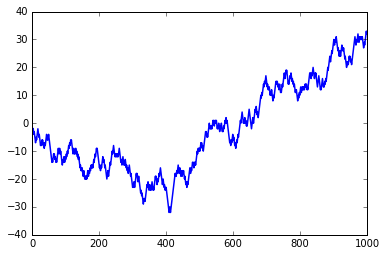

In [42]:
import random

position = 0 # 初始化位置
walk = []
steps = 1000
for _ in range(steps):
    stepwidth = 1 if random.randint(0,1) else -1
    position += stepwidth
    walk.append(position)
#print(walk)
    
    
#plot this trajectory
plt.plot(walk[:1000])

上面的walk数值，其实就是随机数的累计和。不过上面的方式中，我门都是走一步然后产生一个随机数，其实我们可以用numpy.random.randint一次性地产生N个随机数，这里以N=1000为例

In [1]:
nsteps = 1000

In [2]:
import numpy as np

draws = np.random.randint(0, 2, size = nsteps)

In [4]:
steps = np.where(draws > 0, 1, -1)

In [5]:
walk = steps.cumsum()

In [6]:
walk.min()

-44

In [7]:
walk.max()

14

A more complicated statics is the 'first crossing time', the step at which the random walk reaches a particular value. Here we might want to know how long it look the random walk to get at least 10 steps aways from the origin 0 in either direction. np.abs(walk) >= 10 gives us a boolean array indicating where the walk has reached or exceeded 10, but we want the index of the first 10 or -10.

In [9]:
(np.abs(walk) >= 10).argmax()


#Note that using argmax here is not always efficient because 
#it always makes a full scan of the array. In this special case,
#once a True is observed we know it to be the maxi‐ mum value.

21

## 一次模拟多个随机漫步 simulating many random walks at once

如果希望模拟多个随机漫步过程，只需要对上面对代码做一点微调。我们只需要给numpy.random 传入一个二元元祖即可产生一个二维数组，然后我们就能一次性计算5000个随机漫步过程（一行一个）的累计和了。

In [1]:
import numpy as np


In [2]:
nwalks = 5000

In [3]:
nsteps = 1000

In [4]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1

In [6]:
steps = np.where(draws > 0, 1, -1)

In [12]:
walks = steps.cumsum(1)
walks

array([[  1,   2,   1, ...,  30,  29,  28],
       [  1,   0,  -1, ..., -24, -23, -24],
       [ -1,  -2,  -1, ..., -16, -17, -18],
       ..., 
       [  1,   2,   3, ...,  24,  25,  26],
       [ -1,  -2,  -1, ..., -14, -13, -12],
       [ -1,  -2,  -1, ...,  44,  43,  42]])

In [13]:
walks.max()

119

In [14]:
walks.min()

-120

得到这些数据后，我们可以来计算出30或者-30的最小穿越时间。这里得要稍微动一下脑子，因为不是5000个过程都到达了30。我们可以用any方法来对此进行检查

In [15]:
hits30 = (np.abs(walks) >= 30).any(1)


In [16]:
hits30


array([ True, False, False, ...,  True, False,  True], dtype=bool)

In [18]:
hits30.sum() #到达30或者-30的数量

3405

然后我们再利用这个boolean array选出哪些穿越了30（绝对值）的随机漫步（行），并调用argmax在轴1上获取穿越时间：

In [20]:
crossing_times= (np.abs(walks[hits30]) >= 30).argmax(1)

In [21]:
crossing_times.mean()

503.02290748898679

这里请尝试其他分布方式得到漫步数据。只需要使用不同的随机数生成函数即可。例如，normal 用于生成指定均值和标准差的正态分布数据

In [23]:
steps = np.random.normal(loc=0, scale=0.25,
                        size=(nwalks,nsteps))

In [24]:
steps

array([[-0.05707853, -0.32558277,  0.16888499, ...,  0.01340853,
        -0.41062575, -0.01901204],
       [-0.1192972 , -0.07365457, -0.1580069 , ...,  0.42265669,
        -0.0194878 ,  0.13188252],
       [ 0.09545913, -0.00502052, -0.00419816, ..., -0.02590774,
        -0.25936942,  0.08112356],
       ..., 
       [-0.53527113, -0.02276601,  0.43889816, ...,  0.11985573,
         0.28520349,  0.31418609],
       [-0.20536407, -0.12867739,  0.22055881, ...,  0.0991208 ,
         0.48637864, -0.04208851],
       [ 0.36173401, -0.16385084, -0.53649717, ..., -0.14464248,
        -0.14880371, -0.18419619]])

## Appendix for chapter04-note
### date: 2018 Feb.
### I add some note for array operations, the reference book is pthon cookbook by David Beazley et al

## 3.9 处理大型数组的计算 in "python cookbook"

我们需要对大型数据比如数组和网格（grid）进行计算。在进行大型数据计算对时候，一定要善于用numpy，而不是仅仅用python自身的列表计算。numpy有着更高的计算效率。下面我们用例子来说明，列表和NumPy数组的区别：

In [1]:
#python list
x = [1,2,3,4]
y = [5,6,7,8]

In [2]:
x*2

[1, 2, 3, 4, 1, 2, 3, 4]

In [3]:
x+10

TypeError: can only concatenate list (not "int") to list

In [4]:
x+y

[1, 2, 3, 4, 5, 6, 7, 8]

In [5]:
#numpy arrays
import numpy as np
ax = np.array([1,2,3,4])
ay = np.array([5,6,7,8])

In [6]:
ax*2

array([2, 4, 6, 8])

In [7]:
ax+10

array([11, 12, 13, 14])

In [8]:
ax+ay

array([ 6,  8, 10, 12])

从上面可以看出，numpy数组操作时候是对被作用对所有元素的，这一事实使得数组计算都变得简单和快速。比如我们可以快速地计算多项式：

In [9]:
def f(x):
    return 3*x**2 + 2*x +7

f(ax)

array([12, 23, 40, 63])

NumPy提供了一些通用函数集合，他们也能对数组进行直接对操作。这些通用函数可以作为math模块中所对应函数对替代。示例如下：

In [10]:
np.sqrt(ax)

array([ 1.        ,  1.41421356,  1.73205081,  2.        ])

In [11]:
np.cos(ax)

array([ 0.54030231, -0.41614684, -0.9899925 , -0.65364362])

使用NumPy中的通用函数，其效率要比对数组进行迭代然后使用math模块中的函数每次只处理一个元素快上数倍。因此，只要有可能就应该直接使用这些通用函数。

在底层，NumPy 数组的内层分配方式和C和Fortran是一样的。他们在大块的连续内存中存储。正因如此，NumPy才能创建比通常Python列表大许多的数组。例如，如果像创建10000 * 10000的二维浮点函数，这对numpy而言是很轻松的事情：

In [12]:
grid = np.zeros(shape=(10000,10000), dtype=float)

In [13]:
grid

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

所有的通用操作仍然可以同时施加于所有的元素之上：

In [14]:
grid+10

array([[ 10.,  10.,  10., ...,  10.,  10.,  10.],
       [ 10.,  10.,  10., ...,  10.,  10.,  10.],
       [ 10.,  10.,  10., ...,  10.,  10.,  10.],
       ..., 
       [ 10.,  10.,  10., ...,  10.,  10.,  10.],
       [ 10.,  10.,  10., ...,  10.,  10.,  10.],
       [ 10.,  10.,  10., ...,  10.,  10.,  10.]])

In [16]:
np.sin(grid+10)

array([[-0.54402111, -0.54402111, -0.54402111, ..., -0.54402111,
        -0.54402111, -0.54402111],
       [-0.54402111, -0.54402111, -0.54402111, ..., -0.54402111,
        -0.54402111, -0.54402111],
       [-0.54402111, -0.54402111, -0.54402111, ..., -0.54402111,
        -0.54402111, -0.54402111],
       ..., 
       [-0.54402111, -0.54402111, -0.54402111, ..., -0.54402111,
        -0.54402111, -0.54402111],
       [-0.54402111, -0.54402111, -0.54402111, ..., -0.54402111,
        -0.54402111, -0.54402111],
       [-0.54402111, -0.54402111, -0.54402111, ..., -0.54402111,
        -0.54402111, -0.54402111]])

关于NumPy，一个特别值得提起的方面就是NumPy扩展了python列表的索引功能——尤其是针对多维数组时更是如此。现在我们来构建一个简单的二维数组然后做一些简单的experiment

In [60]:
import numpy as np

x=list(range(1,5))
y=list(range(5,9))
z=list(range(9,13))
a = np.array(x)
b = np.array(y)
c = np.array(z)
array1 = np.concatenate((a, b, c), axis=0)
array2 = np.stack((a, b, c), axis=0)

In [54]:
array1

array([ 1,  2,  3,  4,  5,  5,  6,  7,  8,  9, 10, 11, 12])

In [61]:
array2

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [63]:
#select row 1
array2[1]

array([5, 6, 7, 8])

In [67]:
#select column 1
array2[:,1]

array([ 2,  6, 10])

In [68]:
array2[1:3,1:3]

array([[ 6,  7],
       [10, 11]])

In [69]:
array2[1:3,1:3] += 10

In [70]:
array2

array([[ 1,  2,  3,  4],
       [ 5, 16, 17,  8],
       [ 9, 20, 21, 12]])

In [71]:
#broadcast a row vector across an operation on all rows
array2+[100,101,102,103]

array([[101, 103, 105, 107],
       [105, 117, 119, 111],
       [109, 121, 123, 115]])

In [72]:
array2

array([[ 1,  2,  3,  4],
       [ 5, 16, 17,  8],
       [ 9, 20, 21, 12]])

In [73]:
#conditional assigan on an array
np.where(a < 10, a, 10) #a<10 is the condition, if ture, return a. I have introduced np.where before in this chapter

array([1, 2, 3, 4])

## 3.10 矩阵和线性代数的计算 in "python cookbook"

### 3.10.1 Question

如何利用python来进行矩阵乘法，求行列式，解决线性方程等等

### 3.10.2 解决方案

NumPy 中有个 matrix 对象可以用来处理这种情况。matrix 对象和上述3.9中描述的数组对象有些类似，但是在计算时遵循线性代数规则。下面的例子展示了几个重要的特性：

In [74]:
import numpy as np
m = np.matrix([[1,-2,3],[0,4,5],[7,8,-9]])
m

matrix([[ 1, -2,  3],
        [ 0,  4,  5],
        [ 7,  8, -9]])

In [75]:
#Return transpose 转置矩阵
m.T

matrix([[ 1,  0,  7],
        [-2,  4,  8],
        [ 3,  5, -9]])

In [76]:
#return inverse 逆矩阵
m.I

matrix([[ 0.33043478, -0.02608696,  0.09565217],
        [-0.15217391,  0.13043478,  0.02173913],
        [ 0.12173913,  0.09565217, -0.0173913 ]])

In [77]:
# create a vector and multiply
v = np.matrix([[2],[3],[4]])
v

matrix([[2],
        [3],
        [4]])

In [78]:
m*v

matrix([[ 8],
        [32],
        [ 2]])

更多的操作可以在numpy.linalg子模块中找到，例如：

In [ ]:
import numpy.linalg

#Determinant
